In [198]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [176]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Read the train and test file 

In [222]:
#Read the train and test file 

train_dir = '/Users/fatimah/Desktop/DATASET-2/TRAIN'
test_dir = '/Users/fatimah/Desktop/DATASET-2/TEST'

### List each images with their label in dataframe

In [224]:
filenames,labels = [],[]

for dirname in os.listdir(f'{train_dir}'):
    for file in os.listdir(f'{train_dir}/{dirname}'):
        filenames.append(file)
        labels.append(dirname)

df_train = pd.DataFrame(data={
    'filename': filenames,
    'labels': labels
})

In [225]:
df_train.head()

,filename,labels
0,00000372.jpg,downdog
1,00000414.jpg,downdog
2,00000158.jpg,downdog
3,00000164.jpg,downdog
4,00000170.jpg,downdog


### List our 5 labels

In [227]:
num_classes = list(df_train.labels.unique())
print(num_classes)
len(num_classes)

['downdog', 'tree', 'warrior2', 'goddess', 'plank']


5

### Rescale the train and test images 



In [229]:
# Rescale the train and test 

train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [179]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


### Create the model 

In [200]:
model = tf.keras.models.Sequential([
   # Using two filter in hidden layer with Acticition funcation 'relu'
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(224, 224, 3)),
    #Use MaxPooling to reduce the dimensions of the feature map
    tf.keras.layers.MaxPooling2D(2, 2),
     #Use dropout layer to prevent the overfitting
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    

   #using the flatten is converting the data into a 1-dimensional array for inputting it to the next layer.

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
 
    # The output layer using the softmax funcation because our output contain of 5 classes 
    tf.keras.layers.Dense(5, activation='softmax')
])



### Compile the model 

In [203]:

#Using 'adam' optimizer with 15 epoch 

optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'],
             )
epochs = 15  
batch_size = 16

### Model summary 

In [187]:


model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 112, 112, 64)      0         
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 56, 56, 128)     

### Fit the model

In [204]:
history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator )

Epoch 1/15
10/55 [====>.........................] - ETA: 2:07 - loss: 16.6783 - accuracy: 0.2500

/Users/fatimah/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 [==============================] - 169s 3s/step - loss: 4.3939 - accuracy: 0.2206 - val_loss: 1.6007 - val_accuracy: 0.1739
Epoch 2/15
55/55 [==============================] - 158s 3s/step - loss: 1.5968 - accuracy: 0.2275 - val_loss: 1.5304 - val_accuracy: 0.2935
Epoch 3/15
55/55 [==============================] - 155s 3s/step - loss: 1.5545 - accuracy: 0.3441 - val_loss: 1.4421 - val_accuracy: 0.5326
Epoch 4/15
55/55 [==============================] - 147s 3s/step - loss: 1.4440 - accuracy: 0.4388 - val_loss: 1.3869 - val_accuracy: 0.5435
Epoch 5/15
55/55 [==============================] - 164s 3s/step - loss: 1.3742 - accuracy: 0.4411 - val_loss: 1.0433 - val_accuracy: 0.6413
Epoch 6/15
55/55 [==============================] - 158s 3s/step - loss: 1.2848 - accuracy: 0.4873 - val_loss: 1.1930 - val_accuracy: 0.6630
Epoch 7/15
55/55 [==============================] - 146s 3s/step - loss: 1.2222 - accuracy: 0.5427 - val_loss: 0.8885 - val_accuracy: 0.7391
Epoch 8/15
55/55 [======

### Accuracy and Loss Plot

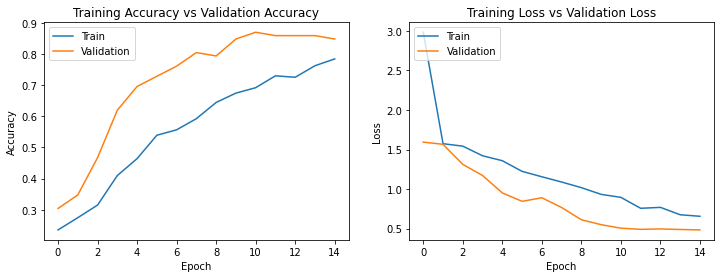

In [190]:

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Extract the label from the validition 

In [191]:
#Extract label from test_set


y_val_org = []
for i in range( validation_generator.__len__() ):
    y_val_org.extend(
        validation_generator.__getitem__( i )[1] 
    )
y_val_org = np.array(y_val_org)
y_val_org = np.argmax(y_val_org, axis=1)

### predication of validation 

In [193]:
predication = model.predict(validation_generator)

predication

3/3 [==============================] - 4s 1s/step


array([[9.95140406e-04, 2.62352765e-01, 3.33255865e-02, 5.01052057e-03,
        6.98315978e-01],
       [2.07687658e-03, 1.73148001e-03, 9.94339049e-01, 1.34206202e-03,
        5.10544109e-04],
       [8.03142965e-01, 1.38418004e-02, 1.45317033e-01, 1.21913254e-02,
        2.55068988e-02],
       [3.53528420e-03, 7.41586983e-01, 1.85356569e-02, 2.42281314e-02,
        2.12113917e-01],
       [1.02186352e-01, 5.74965477e-01, 1.90611891e-02, 1.25144152e-02,
        2.91272581e-01],
       [9.90565658e-01, 3.85678053e-04, 5.83879696e-03, 8.55162856e-04,
        2.35469406e-03],
       [7.46669054e-01, 2.57414649e-05, 2.50989735e-01, 2.31361995e-03,
        1.88659067e-06],
       [8.12885582e-01, 3.27401124e-02, 7.46427253e-02, 1.21594046e-03,
        7.85155892e-02],
       [2.58211881e-01, 2.75960248e-02, 7.04897225e-01, 1.96007197e-03,
        7.33481953e-03],
       [7.37039298e-02, 1.27794743e-01, 1.92112997e-02, 2.33799703e-02,
        7.55910099e-01],
       [6.46604002e-01, 2.0802

### convert predication into label 

In [194]:


predication_classes = [np.argmax(element) for element in predication]
predication_classes

[4,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 4,
 0,
 2,
 4,
 4,
 4,
 0,
 4,
 0,
 0,
 0,
 2,
 2,
 0,
 3,
 0,
 0,
 2,
 0,
 1,
 1,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 2,
 4,
 4,
 2,
 0,
 1,
 2,
 4,
 0,
 4,
 4,
 3,
 2,
 4,
 2,
 4,
 2,
 3,
 1,
 4,
 4,
 0,
 3,
 4,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 3,
 4,
 0,
 0,
 1,
 2,
 1,
 3,
 2,
 4,
 1,
 0,
 0,
 3,
 3,
 4,
 4,
 2,
 0,
 1,
 2,
 2]

### classification Report

In [195]:
print(classification_report(y_val_org, predication_classes))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        19
           1       0.82      0.56      0.67        16
           2       0.95      0.91      0.93        23
           3       1.00      0.92      0.96        13
           4       0.74      0.81      0.77        21

    accuracy                           0.85        92
   macro avg       0.86      0.84      0.84        92
weighted avg       0.85      0.85      0.84        92

